# Elastic Net

In [1]:
import os, sys, pathlib

UTILS_FOLDER = "S00 - Utils"
curPath = os.getcwd()
parPath = pathlib.Path(curPath).parent
utilPath = os.path.join(parPath, UTILS_FOLDER)
for p in [curPath, str(parPath), utilPath]:
    sys.path.append(p)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from utils import plot_reg, plot_res, store_results
from sklearn.linear_model import ElasticNet



In [3]:
# Load data
df = pd.read_excel(
    f"{utilPath}/housing_data.xlsx",
)

# Extract data
X = df[["LSTAT"]].values
y = df["MEDV"].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [4]:
#if ratio = 1, we have LASSO, ratio = 0, we have RIDGE.
paramSet = {
    "ex1": {"alpha": 1, "l1_ratio": 0.5},
    "ex2": {"alpha": 10, "l1_ratio": 0.5},
    "ex3": {"alpha": 20, "l1_ratio": 0.5},
    "ex4": {"alpha": 30, "l1_ratio": 0.5},
}


,Model,Coef,Intercept,MSE Train,MSE Test,R2 Train,R2 Test,Params
0,Elas-ex1,0.948640,34.547180,37.952978,39.718036,0.552254,0.522995,"{""alpha"": 1, ""l1_ratio"": 0.5}"
1,Elas-ex2,0.789100,32.562394,39.535589,40.427097,0.533583,0.514480,"{""alpha"": 10, ""l1_ratio"": 0.5}"
2,Elas-ex3,0.639917,30.706466,43.316574,43.540835,0.488978,0.477084,"{""alpha"": 20, ""l1_ratio"": 0.5}"
3,Elas-ex4,0.513699,29.136225,48.252305,48.024934,0.430749,0.423231,"{""alpha"": 30, ""l1_ratio"": 0.5}"


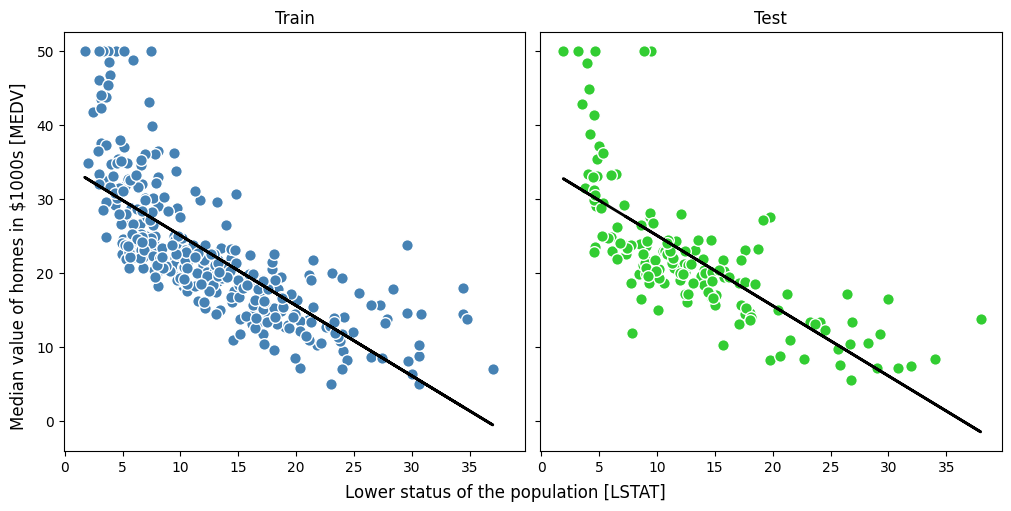

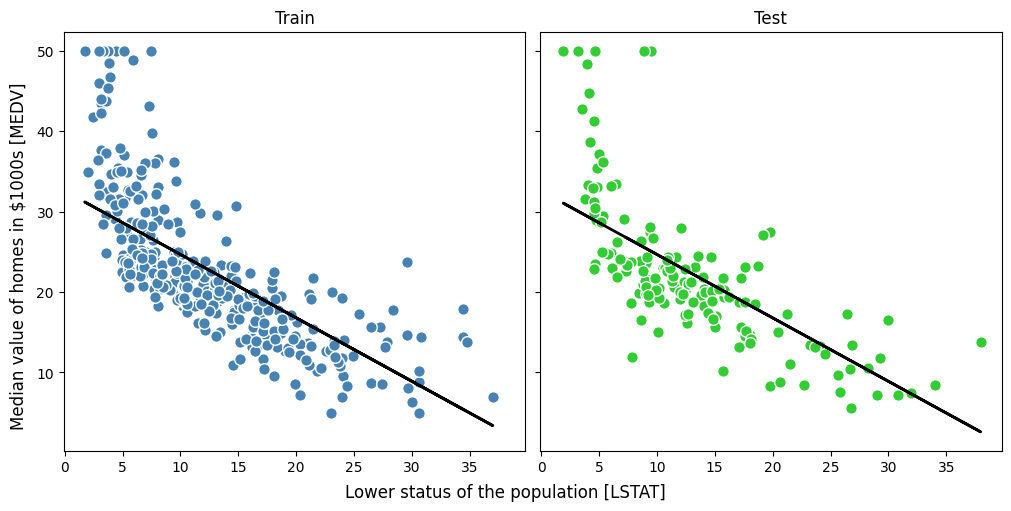

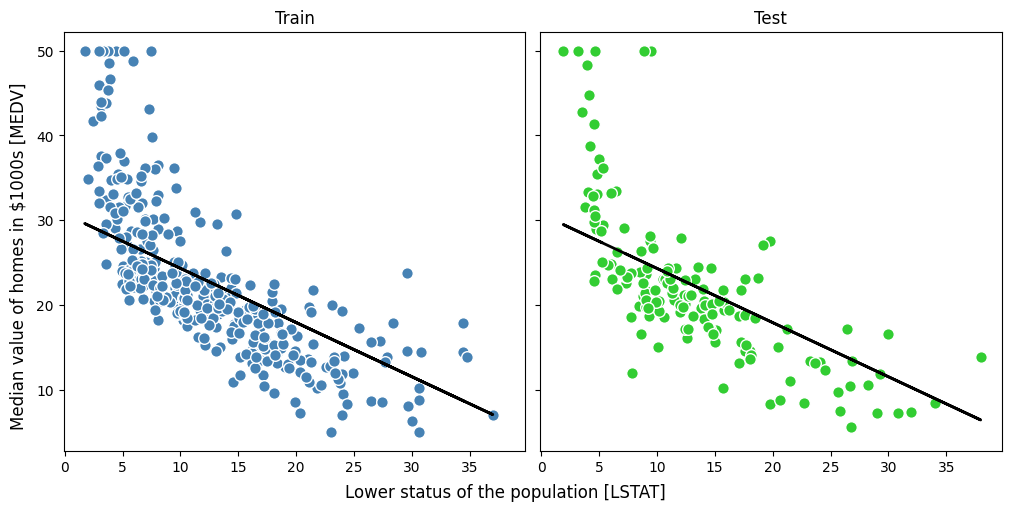

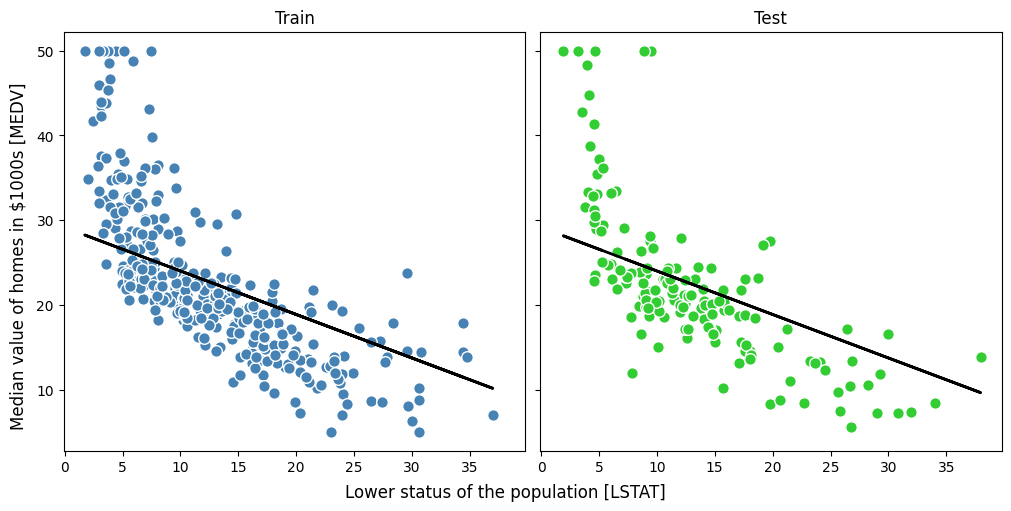

In [5]:
results = []

for name, values in paramSet.items():
    model  = ElasticNet(**values)
  
    # Fitting model
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    store_results(
        results=results,
        model_name=f"Elas-{name}",
        model=model,
        y_train=y_train,
        y_test=y_test,
        y_train_pred=y_train_pred,
        y_test_pred=y_test_pred,
        params=values,

    )

    # Plotting
    plot_reg(X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)
    # plot_res(y_train, y_test, y_train_pred, y_test_pred)

df = pd.DataFrame.from_records(results)
display(df)
